# Data Acquisition

# Exercises


#### The end product of these exercise is a jupyter notebook (classification_exercises.ipynb) and a acquire.py file. The notebook will contain all your work as you move through the exercises. The acquire.py file should contain the final functions that acquire the data into a pandas dataframe.

 1. Make a new repo called classification-exercises on both GitHub and within your codeup-data-science directory. This will be where you do your work for this module.

 2. Inside of your local classification-exercises repo, create a file named .gitignore with the following contents:


    env.py
    .DS_Store
    .ipynb_checkpoints/
    __pycache__
    *.csv
    *.xlsx
    
    Add and commit your .gitignore file before moving forward.

 3. Now that you are 100% sure that your .gitignore file lists env.py, create or copy your env.py file inside of classification-exercises. Running git status should show that git is ignoring this file.

 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [1]:
import pandas as pd 
import acquire as acq
from env import get_db_url
import os

In [2]:
os.getcwd()

'/Users/rosendo/codeup-data-science/classification-exercises'

In [3]:
# This is only to show how many tables you have in the database iris. 
# Create a query to join all the tables to you can have one big table 
# and add it to your def function inside the acquire.py file, so it 
# can pull all the tables a once. 
url = get_db_url('iris_db')
query = '''
show tables
'''
iris_tables = pd.read_sql(query, url)
iris_tables

,Tables_in_iris_db
0,measurements
1,species


In [4]:
df_iris = acq.get_iris_data()

csv file found and loaded


In [5]:
df_iris

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


#### 5. Read the data from this google sheet into a dataframe, df_google.

In [6]:
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"

In [7]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

   #### 5.1 print the first 3 rows

In [9]:
df_google = pd.read_csv(csv_export_url)

In [10]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


   #### 5.2     print the number of rows and columns

In [17]:
df_google.shape

(891, 12)

   #### 5.3     print the column names

In [19]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

   #### 5.4     print the data type of each column

In [22]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

   #### 5.5     print the summary statistics for each of the numeric variables

In [23]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   #### 5.6     print the unique values for each of your categorical variables

In [24]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [25]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
for col in df_google.columns.to_list():
    if df_google[col].dtype == 'object':
        print(f"{col} has {df_google[col].nunique()} unique values.")

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [28]:
df_google.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [30]:
df_google.select_dtypes('int64').nunique()

PassengerId    891
Survived         2
Pclass           3
SibSp            7
Parch            7
dtype: int64

In [32]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

 ### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [33]:
df_excel = pd.read_excel('train.xlsx', sheet_name = 'train')

In [34]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


   #### 6.1 assign the first 100 rows to a new dataframe, df_excel_sample

In [35]:
df_excel_sample = df_excel.head(100)

In [36]:
df_excel_sample.shape

(100, 12)

   #### 6.2 print the number of rows of your original dataframe

In [37]:
df_excel.shape[0] # number of rows

891

In [39]:
df_excel.shape[1] # number of columns

12

   #### 6.3 print the first 5 column names

In [40]:
# for this you need to use the square brackets
df_excel.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [41]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [42]:
df_excel.columns[:5].to_list()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex']

   #### 6.4 print the column names that have a data type of object

In [43]:
df_excel.select_dtypes('object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [44]:
df_excel.select_dtypes('object').columns.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [45]:
df_excel.select_dtypes('object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [46]:
df_excel.select_dtypes(exclude = 'object').columns.to_list()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [47]:
df_excel.select_dtypes(exclude = 'object').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


   #### 6.5 compute the range for each of the numeric variables.

In [48]:
df_excel.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df_excel[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [50]:
titanic_stats = df_excel[['Age', 'Fare']].describe().T

In [51]:
titanic_stats

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [52]:
titanic_stats['max'] - titanic_stats['min'] 

Age      79.5800
Fare    512.3292
dtype: float64

In [53]:
titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min'] 
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


##### Make a new python module, acquire.py to hold the following data aquisition functions:

### A1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [77]:
from env import get_db_url

In [78]:
def get_titanic_data():
    url = get_db_url('titanic_db')
    filename = 'titanic.csv'
    query = 'select * from passengers'
    
    df = check_file_exists(filename, query, url)
    return df 

### A2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [79]:
def get_iris_data():
    url = get_db_url('iris_db')
    query = '''
            select * from measurements
                join species
                    using (species_id)
            '''
    filename = 'iris.csv'
    df = check_file_exists(filename, query, url)
    return df

### A3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [80]:
def get_telco_data():
    url = get_db_url('telco_churn')
    query = ''' select * from customers
                        join contract_types
                            using (contract_type_id)
                        join internet_service_types
                            using (internet_service_type_id)
                        join payment_types
                            using (payment_type_id)
            '''
    filename = 'telco.csv'
    df = check_file_exists(filename, query, url)

    return df

### A4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

##### Make sure your env.py and csv files are not being pushed to GitHub!

In [81]:
def check_file_exists(fn, query, url):
    """
    check if file exists in my local directory, if not, pull from sql db
    return dataframe
    """
    if os.path.isfile(fn):
        print('csv file found and loaded')
        return pd.read_csv(fn, index_col=0)
    else: 
        print('creating df and exporting csv')
        df = pd.read_sql(query, url)
        df.to_csv(fn)
        return df

In [82]:
df_titanic = get_titanic_data()

csv file found and loaded


In [83]:
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [84]:
df_iris = get_iris_data()

csv file found and loaded


In [85]:
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [86]:
df_telco = get_telco_data()

csv file found and loaded


In [87]:
df_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


-

-

## ------------------------------------- NEXT LESSON -----------------------------------------------

-

-

# DATA PREPARATION

## Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

In [1]:
import acquire as acq
import pandas as pd 
import os

from sklearn.model_selection import train_test_split

# Using the Iris Data:

    1. Use the function defined in acquire.py to load the iris data.

In [2]:
df_iris = acq.get_iris_data()

csv file found and loaded


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [4]:
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


    2. Drop the species_id and measurement_id columns.

In [5]:
df_iris = df_iris.drop(columns = 'species_id')

In [6]:
df_iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [7]:
df_iris = df_iris.drop(columns = 'measurement_id')

In [8]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


    3. Rename the species_name column to just species.

In [9]:
df_iris = df_iris.rename(columns={'species_name': 'species'})

In [10]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


    4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [11]:
# Just looking at the species column
df_iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [12]:
# looking at the species data
df_iris.species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [13]:
# use get_dummies on species data
pd.get_dummies(df_iris.species).head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
# creating dummy variables for 'species'
dummy_df = pd.get_dummies(df_iris.species, drop_first=True)
dummy_df.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [15]:
# concatenate the dummy_df dataframe above with the original df and validate.
df_iris = pd.concat([df_iris, dummy_df], axis=1)

In [16]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


    5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [17]:
def prep_iris(df_iris):
    '''
    This function prepares the iris data by dropping the species_id and measurement_id.
    It also renames the species_name column to species and creates a dummies for the
    column species and at the end concats the dummy species columns with the iris database
    '''
    df_iris = df_iris.drop(columns = ['species_id', 'measurement_id'])
    df_iris = df_iris.rename(columns={'species_name': 'species'})
    dummy_iris = pd.get_dummies(df_iris.species, drop_first=True)
    df_iris = pd.concat([df_iris, dummy_iris], axis=1)
    return df_iris

In [18]:
# This calls for a new dataset
fresh_iris = acq.get_iris_data()

csv file found and loaded


In [19]:
# This cleans the new dataset with the def function that was just created. 
prep_iris(fresh_iris)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,1
146,6.3,2.5,5.0,1.9,virginica,0,1
147,6.5,3.0,5.2,2.0,virginica,0,1
148,6.2,3.4,5.4,2.3,virginica,0,1


# Using the Titanic dataset

    1. Use the function defined in acquire.py to load the Titanic data.

In [20]:
df_titanic = acq.get_titanic_data()

csv file found and loaded


In [21]:
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


    2. Drop any unnecessary, unhelpful, or duplicated columns.

In [22]:
df_titanic = df_titanic.drop(columns=['embark_town', 'class', 'age', 'deck'])

In [23]:
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone
0,0,0,3,male,1,0,7.2500,S,0
1,1,1,1,female,1,0,71.2833,C,0
2,2,1,3,female,0,0,7.9250,S,1
3,3,1,1,female,1,0,53.1000,S,0
4,4,0,3,male,0,0,8.0500,S,1


    3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [24]:
# create dummy variables for 'sex' and 'embarked'
dummy_titanic = pd.get_dummies(df_titanic[['sex', 'embarked']], drop_first=True)
dummy_titanic

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [25]:
# concatenate the dummy_df dataframe above with the original df and validate.
df_titanic = pd.concat([df_titanic, dummy_titanic], axis=1)

In [26]:
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


    4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [27]:
# This will clean the data. 
def prep_titanic(df_titanic):
    '''
    This function will clean the the titanic dataset
    '''
    df_titanic = df_titanic.drop(columns =['embark_town','class','age','deck'])
    dummy_titanic = pd.get_dummies(df_titanic[['sex','embarked']], drop_first=True)
    df_titanic = pd.concat([df_titanic, dummy_titanic], axis=1)
    return df_titanic

In [28]:
# Pull a new titanic dataset
fresh_titanic = acq.get_titanic_data()

csv file found and loaded


In [29]:
# Clean the new dataset using the new function called prep_titanic
prep_titanic(fresh_titanic)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


# Using the Telco dataset

    1. Use the function defined in acquire.py to load the Telco data.

In [30]:
df_telco = acq.get_telco_data()

csv file found and loaded


In [31]:
df_telco.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [32]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [33]:
df_telco.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [34]:
# Don't forget to do this part
for col in df_telco.columns:
    print(col)
    print(df_telco[col].value_counts())
    print(df_telco[col].value_counts(normalize=True))
    print()

payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
1    0.335794
2    0.228880
3    0.219225
4    0.216101
Name: payment_type_id, dtype: float64

internet_service_type_id
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
2    0.439585
1    0.343746
3    0.216669
Name: internet_service_type_id, dtype: float64

contract_type_id
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
1    0.550192
3    0.240664
2    0.209144
Name: contract_type_id, dtype: float64

customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.000142
3352-ALMCK    0.000142
3351-NQLDI    0.000142
3351-NGXYI    0.

    2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [35]:
pd.crosstab(df_telco.payment_type, df_telco.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [36]:
pd.crosstab(df_telco.contract_type, df_telco.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


In [37]:
pd.crosstab(df_telco.internet_service_type, df_telco.internet_service_type)

internet_service_type,DSL,Fiber optic,None
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


In [38]:
df_telco = df_telco.drop(columns =['contract_type_id', 'internet_service_type_id', 'payment_type_id']) # drop the payment_type_id
df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [39]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [40]:
for col in df_telco.columns:
    print(df_telco[col].value_counts())
    print

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: senior_citizen, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: phone_service, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
No  

    3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [41]:
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [42]:
# df_telco.gender.map({'Female': 1, 'Male' : 0})

In [43]:
dummy_telco = pd.get_dummies(df_telco[['gender',
                                         'partner',
                                         'dependents',
                                         'phone_service',
                                         'multiple_lines',
                                         'online_security',
                                         'online_backup',
                                         'device_protection',
                                         'tech_support',
                                         'streaming_tv',
                                         'streaming_movies',
                                         'paperless_billing',
                                         'churn',
                                         'contract_type',
                                         'internet_service_type',
                                         'payment_type']], drop_first=True)

In [44]:
dummy_telco.head().T

,0,1,2,3,4
gender_Male,0,1,1,1,0
partner_Yes,1,0,0,1,1
dependents_Yes,1,0,0,0,0
phone_service_Yes,1,1,1,1,1
multiple_lines_No phone service,0,0,0,0,0
multiple_lines_Yes,0,1,0,0,0
online_security_No internet service,0,0,0,0,0
online_security_Yes,0,0,0,0,0
online_backup_No internet service,0,0,0,0,0
online_backup_Yes,1,0,0,1,0


In [45]:
# Concatenate the dummy_df dataframe above with the original df and validate.

df_telco = pd.concat([df_telco, dummy_telco], axis=1)
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,0,1


In [46]:
df_telco.total_charges = df_telco.total_charges.str.replace(' ', '0').astype(float)

In [48]:
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,0,1


    4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [49]:
# This will clean the data. 
def prep_telco(df_telco):
    '''
    This function will clean the the telco dataset
    '''
    df_telco = df_telco.drop(columns =['contract_type_id', 'internet_service_type_id', 'payment_type_id'])
    
    dummy_telco = pd.get_dummies(df_telco[['gender',
                                             'partner',
                                             'dependents',
                                             'phone_service',
                                             'multiple_lines',
                                             'online_security',
                                             'online_backup',
                                             'device_protection',
                                             'tech_support',
                                             'streaming_tv',
                                             'streaming_movies',
                                             'paperless_billing',
                                             'churn',
                                             'contract_type',
                                             'internet_service_type',
                                             'payment_type']], dummy_na=False, drop_first=[True, True])
    df_telco = pd.concat([df_telco, dummy_telco], axis=1)
    df_telco.total_charges = df_telco.total_charges.str.replace(' ', '0').astype(float)
    return df_telco

In [50]:
fresh_df_telco = acq.get_telco_data()

csv file found and loaded


In [51]:
fresh_df_telco.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [52]:
fresh_df_telco = prep_telco(fresh_df_telco)

In [53]:
fresh_df_telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [54]:
fresh_df_telco.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

# Split your data

    1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [55]:
def split_function(df, target_varible):
    train, test = train_test_split(df,
                                   random_state=123,
                                   test_size=.20,
                                   stratify= df[target_varible])
    
    train, validate = train_test_split(train,
                                   random_state=123,
                                   test_size=.25,
                                   stratify= train[target_varible])
    return train, validate, test

    2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [56]:
train_df_iris, validate_df_iris, test_df_iris = split_function(df_iris, 'species')

In [57]:
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_df_iris.shape}')
print(f'Validate: {validate_df_iris.shape}')
print(f'Test: {test_df_iris.shape}')

Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


    3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [58]:
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


In [59]:
train_df_titanic, validate_df_titanic, test_df_titanic = split_function(df_titanic, 'survived')

In [60]:
print(f'Prepared df: {df_titanic.shape}')
print()
print(f'Train: {train_df_titanic.shape}')
print(f'Validate: {validate_df_titanic.shape}')
print(f'Test: {test_df_titanic.shape}')


Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


    4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [61]:
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,0,1


In [62]:
train_df_telco, validate_df_telco, test_df_telco = split_function(df_telco, 'churn')

In [63]:
print(f'Prepared df: {df_telco.shape}')
print()
print(f'Train: {train_df_telco.shape}')
print(f'Validate: {validate_df_telco.shape}')
print(f'Test: {test_df_telco.shape}')

Prepared df: (7043, 48)

Train: (4225, 48)
Validate: (1409, 48)
Test: (1409, 48)


-

-

## ------------------------------------- NEXT LESSON -----------------------------------------------

-

-

# Exploratory Data Analysis

## Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as acq
import prepare as pr
import os

#stats
from scipy import stats
from sklearn.model_selection import train_test_split
np.random.seed(123)

## Part 1
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

**Section 1** - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [23]:
fresh_df_iris = acq.get_iris_data()

csv file found and loaded


In [24]:
df_iris = pr.prep_iris(fresh_df_iris)

In [25]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,1
146,6.3,2.5,5.0,1.9,virginica,0,1
147,6.5,3.0,5.2,2.0,virginica,0,1
148,6.2,3.4,5.4,2.3,virginica,0,1


In [26]:
train, validate, test = pr.split_function(df_iris, 'species')
train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [27]:
print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


In [28]:
train.mean()

/var/folders/67/bss6mpl54l73122199y9h3r40000gn/T/ipykernel_9783/3309660196.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.mean()


sepal_length    5.875556
sepal_width     3.070000
petal_length    3.782222
petal_width     1.203333
versicolor      0.333333
virginica       0.333333
dtype: float64

In [29]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
70,5.9,3.2,4.8,1.8,versicolor,1,0
123,6.3,2.7,4.9,1.8,virginica,0,1
87,6.3,2.3,4.4,1.3,versicolor,1,0
3,4.6,3.1,1.5,0.2,setosa,0,0
15,5.7,4.4,1.5,0.4,setosa,0,0


#### 2. Univariate Stats

    For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

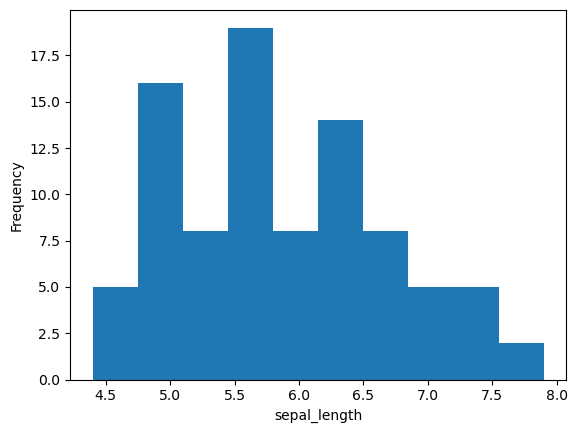

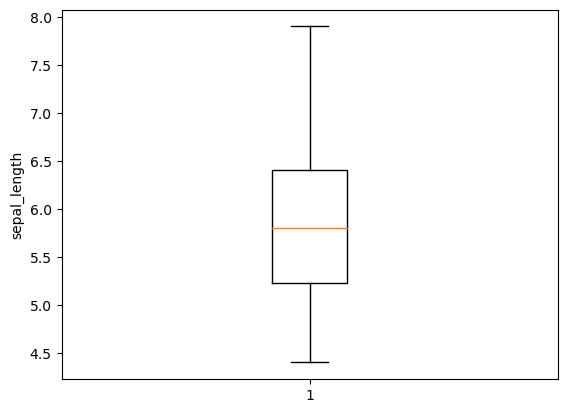

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


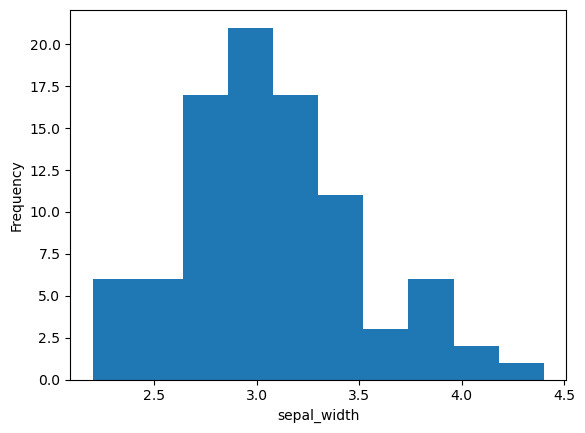

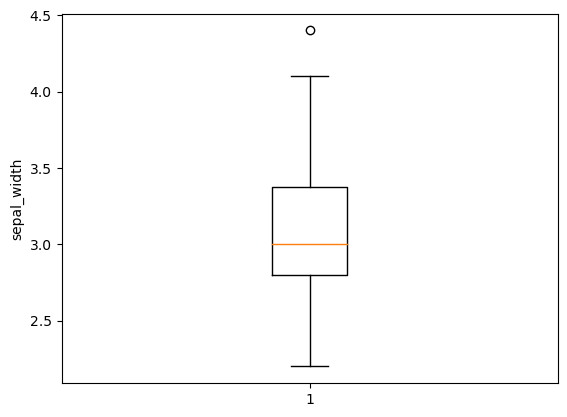

count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64


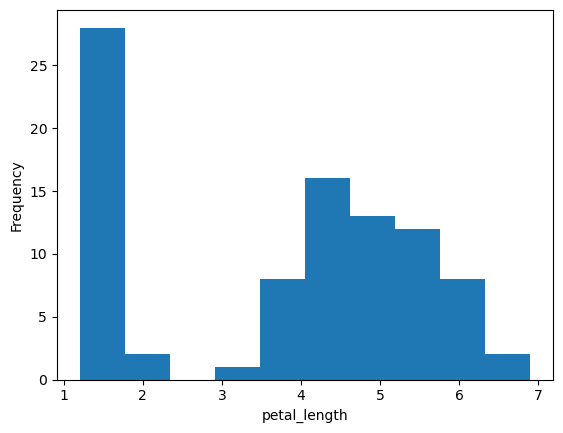

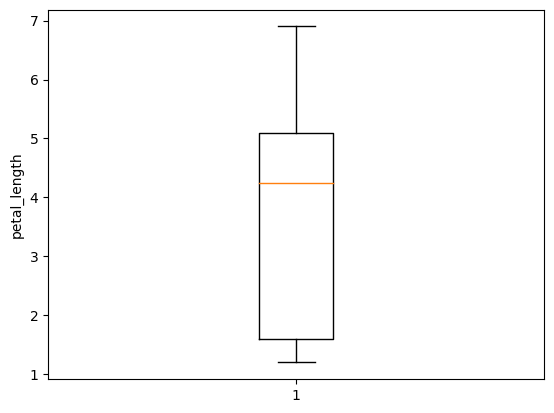

count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


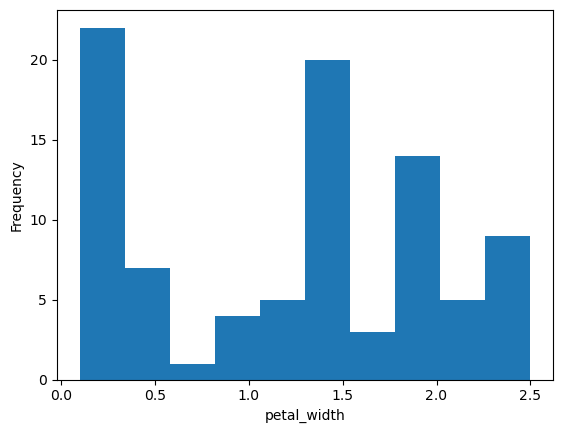

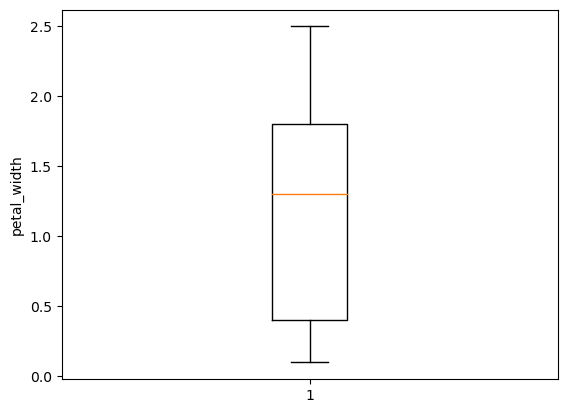

count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [30]:
# Iterate over each quantitative variable
for col in train.select_dtypes(include=['float', 'int']):
    
    # Create a histogram
    plt.hist(train[col], bins=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Create a boxplot
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()
    
    # Compute descriptive statistics
    stats = train[col].describe()
    print(stats)

    For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [31]:
for col in train.select_dtypes(include=['float', 'int']):
    
    the_data = pd.cut(train[col], 5)

    print(the_data.value_counts())

(5.1, 5.8]      27
(5.8, 6.5]      25
(4.397, 5.1]    21
(6.5, 7.2]      13
(7.2, 7.9]       4
Name: sepal_length, dtype: int64
(2.64, 3.08]     38
(3.08, 3.52]     28
(2.198, 2.64]    12
(3.52, 3.96]      9
(3.96, 4.4]       3
Name: sepal_width, dtype: int64
(1.194, 2.34]    30
(4.62, 5.76]     25
(3.48, 4.62]     24
(5.76, 6.9]      10
(2.34, 3.48]      1
Name: petal_length, dtype: int64
(0.0976, 0.58]    29
(1.06, 1.54]      25
(1.54, 2.02]      17
(2.02, 2.5]       14
(0.58, 1.06]       5
Name: petal_width, dtype: int64


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


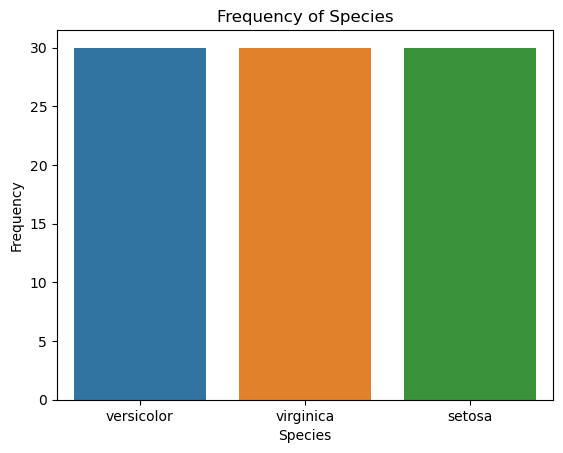

      species  frequency
0  versicolor         30
1   virginica         30
2      setosa         30


In [32]:
# Calculate frequency of each species and create a new dataframe
species_freq = train['species'].value_counts().reset_index()
species_freq.columns = ['species', 'frequency']

# Create a bar plot
sns.barplot(species_freq['species'], species_freq['frequency'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species')
plt.show()

# Print the frequency table
print(species_freq)

    Document takeaways & any actions.

    - The petal width and length don't have a normal distribution. 
    - All three species have the same frequency of 30.

#### 3. Bivariate Stats

In [33]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
70,5.9,3.2,4.8,1.8,versicolor,1,0
123,6.3,2.7,4.9,1.8,virginica,0,1
87,6.3,2.3,4.4,1.3,versicolor,1,0
3,4.6,3.1,1.5,0.2,setosa,0,0
15,5.7,4.4,1.5,0.4,setosa,0,0


    Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

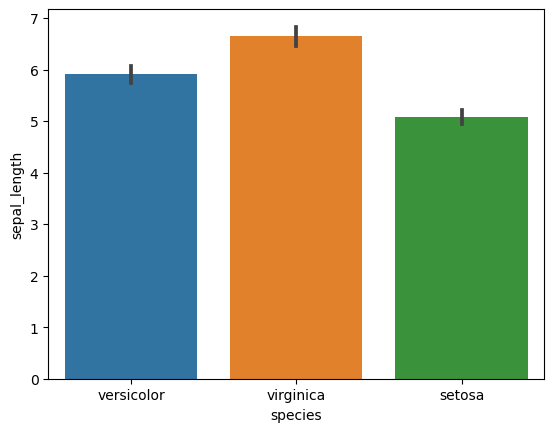

In [34]:
sns.barplot(data=train, x='species', y='sepal_length')
plt.show()

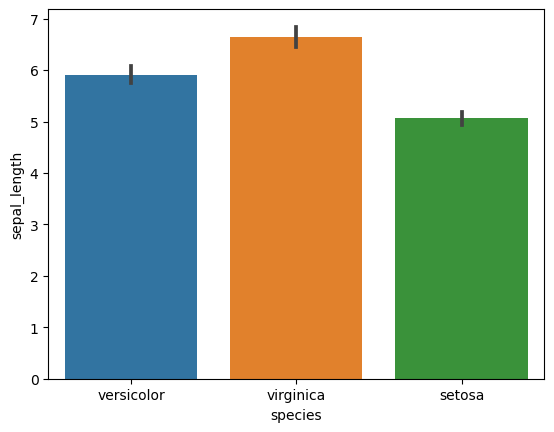

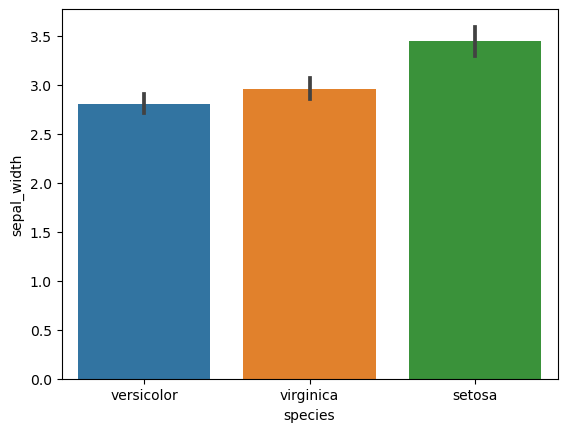

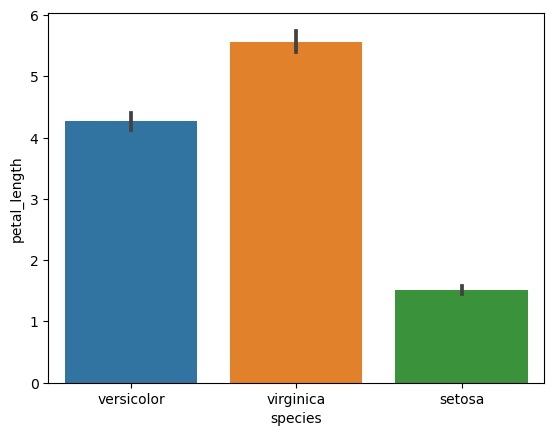

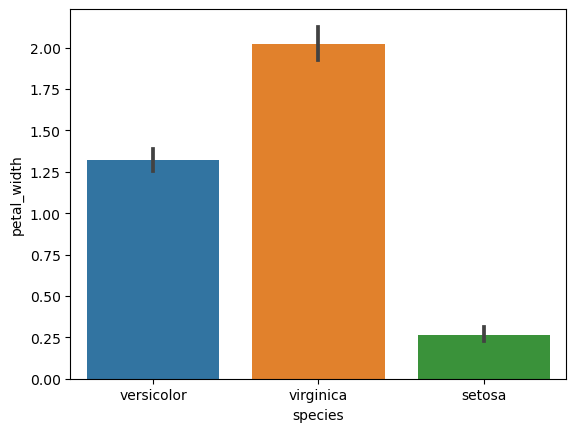

In [35]:
# All the columns
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# for i in range(len(columns)):
#     # Create a boxplot
#     sns.barplot(data=train, x='species', y=columns[i])
#     plt.show()

for i in columns:
# Create a boxplot
    sns.barplot(data=train, x='species', y=i)
    # species_rate = train.species.mean()
    # plt.axhline(species_rate, label="Species rate")
    plt.show()

    For each measurement type, compute the descriptive statistics for each species.

In [36]:
# Calculate descriptive statistics
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i in columns:
    print(f"{i} descriptive statistics:")
    print(train[i].describe())
    print()

sepal_length descriptive statistics:
count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

sepal_width descriptive statistics:
count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64

petal_length descriptive statistics:
count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

petal_width descriptive statistics:
count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64



    For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [37]:
# Name of the columns
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
alpha = 0.05
virginica = train [train.species == 'virginica']
versicolor = train [train.species == 'versicolor']

for i in columns:
    t, p = stats.mannwhitneyu(virginica[i], versicolor[i])
    print(f'Mann-Whitney test result for {i} comparing Versicolor vs Virginica:')
    print(f'p-value = {p:.10f}')
    if p < alpha:
        print('The difference in mean values is statistically significant at the', alpha*100, '% significance level.')
        print('We reject the null hypothesis')
    else:
        print('There is no statistically significant difference in mean values at the', alpha*100, '% significance level.')
        print('We fail to reject the null hypothesis')
    print('\n')


AttributeError: 'Series' object has no attribute 'mannwhitneyu'

    Document takeaways & any actions.

- sure of my take aways

#### 4. Multivariate Stats

    Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

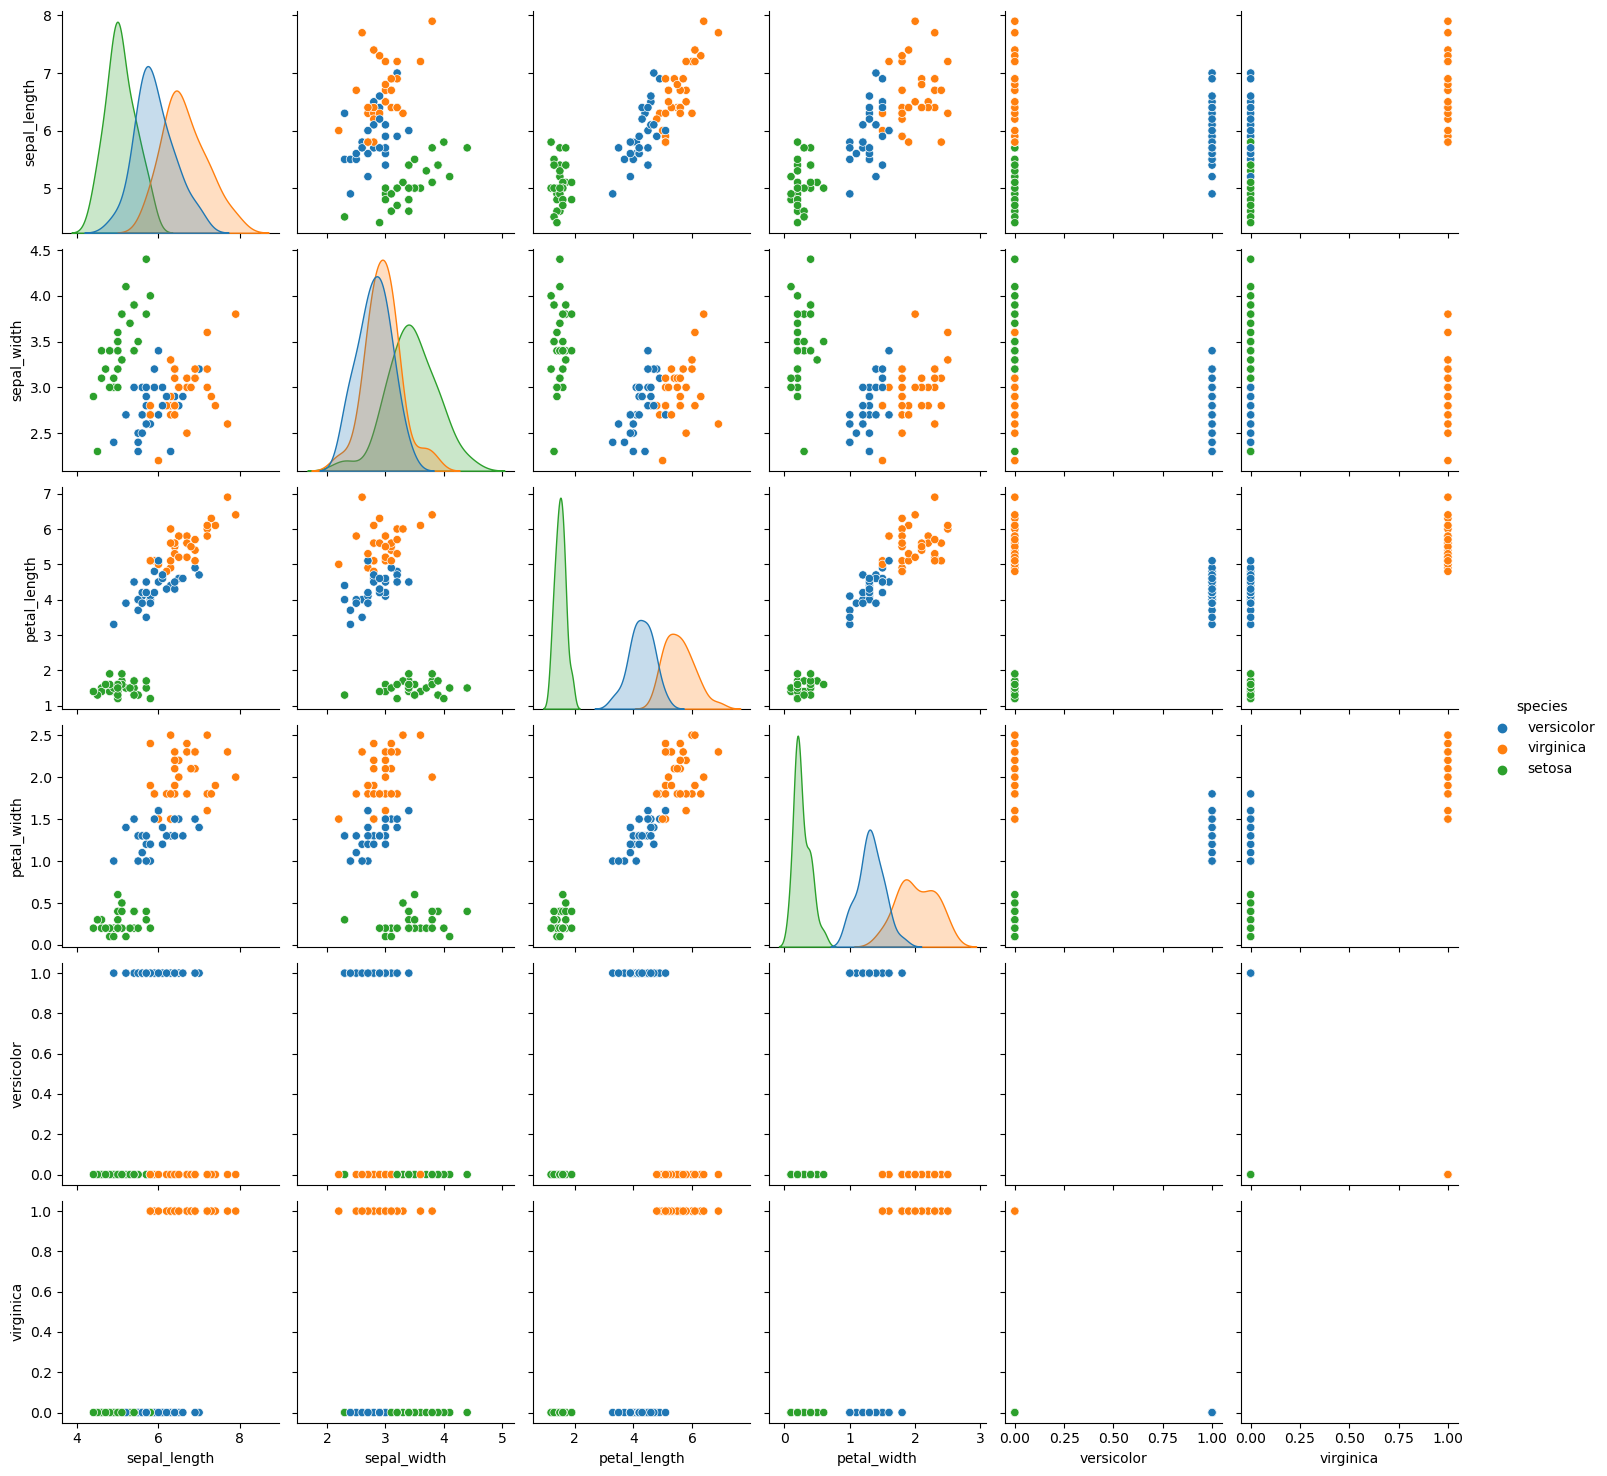

In [72]:
# Create a pairplot
sns.pairplot(data=train, hue='species')
plt.show()

    Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

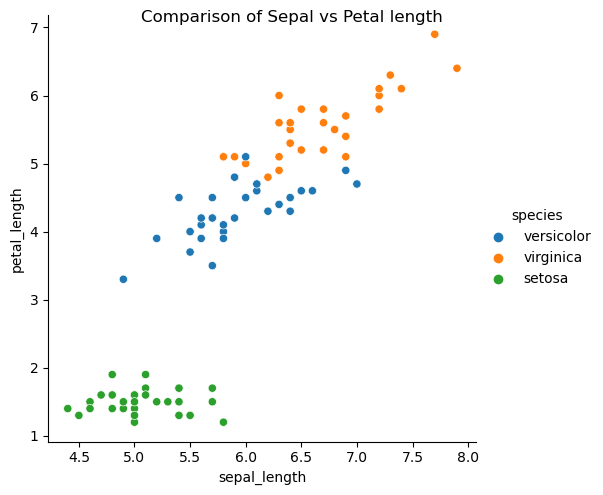

In [73]:
# Relational Plot (relplot)
rel = sns.relplot(x='sepal_length', y='petal_length', data=train, hue='species')
rel.fig.suptitle('Comparison of Sepal vs Petal length')
plt.show()

    Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    **SKIP**

    Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [76]:
# Calculate sepal area for each species
train['sepal_area'] = train['sepal_length'] * train['sepal_width']

# Split the dataset by species
virginica = train[train['species'] == 'virginica']
setosa = train[train['species'] == 'setosa']

t, p = stats.mannwhitneyu(virginica['sepal_area'], setosa['sepal_area'])

print(f"The Mann-Whitney test p-value for virginica vs setosa's sepal area is {p:.4f}")

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

The Mann-Whitney test p-value for virginica vs setosa's sepal area is 0.0099
We reject the null hypothesis


<function matplotlib.pyplot.show(close=None, block=None)>

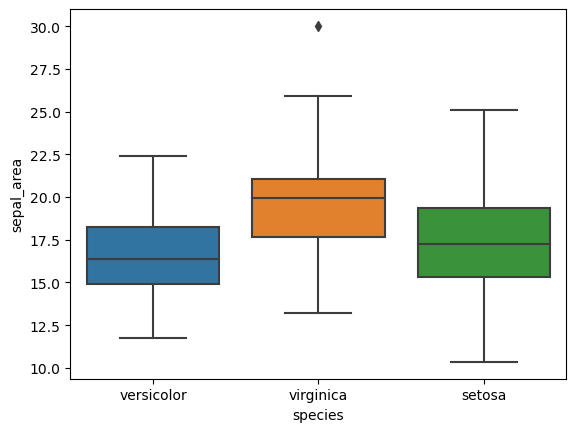

In [77]:
# The sepal area for each species
sns.boxplot(x='species', y='sepal_area', data=train)
plt.show

    Document takeaways and any actions.

- By looking at the scatter plot comparing sepal length and petal length, we can see that the setosa species tends to have shorter petals and sepals, while the virginica species tends to have longer petals and sepals. The versicolor species falls in between the two.

- The takeaway from this analysis is that the different iris species have distinct patterns in their measurements that allow us to distinguish them from each other. Additionally, we found a significant difference in sepal area between the virginica and setosa species. This information could be useful in identifying and classifying iris species.

## Part III

>Explore your telco data to discover drivers of churn

>Determine if certain columns should be dropped

   > - I don't think there are more columns to be dropped

>Determine if it would be valuable to bin some numeric columns
   > - created a new column 'tenure_group' by binning the 'tenure' column. This column was "new customers" (tenure less than 6 months), "moderate tenure customers" (tenure between 6 and 24 months), and "long-term customers" (tenure greater than 24 months). 

>Determine if it would be valuable to combine multiple columns into one.

In [2]:
df_telco = acq.get_telco_data()

csv file found and loaded


In [4]:
df_telco = pr.prep_telco(df_telco)

In [5]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [7]:
df_telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1


In [9]:
# create a new column 'tenure_group' by binning the 'tenure' column
bins = [0, 6, 24, df_telco['tenure'].max()]
labels = ['new customers', 'moderate tenure customers', 'long-term customers']
df_telco['tenure_group'] = pd.cut(df_telco['tenure'], bins=bins, labels=labels, include_lowest=True)

In [10]:
df_telco.head(2).T

,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
tenure,9,9
phone_service,Yes,Yes
multiple_lines,No,Yes
online_security,No,No
online_backup,Yes,No


In [11]:
# Create a new column called "internet_security"
df_telco["internet_security"] = "No internet security" # initialize all values to "No internet security"
df_telco.loc[(df_telco["internet_service_type"] == "Fiber optic") & (df_telco["online_security"] == "Yes"), "internet_security"] = "Internet security"
df_telco.loc[(df_telco["internet_service_type"] == "DSL") & (df_telco["online_security"].isin(["Yes", "No internet service"])), "internet_security"] = "Internet security"

# Now you can examine the relationship between internet security and churn


In [13]:
df_telco.head(2).T

,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
tenure,9,9
phone_service,Yes,Yes
multiple_lines,No,Yes
online_security,No,No
online_backup,Yes,No


#### What are your drivers of churn?

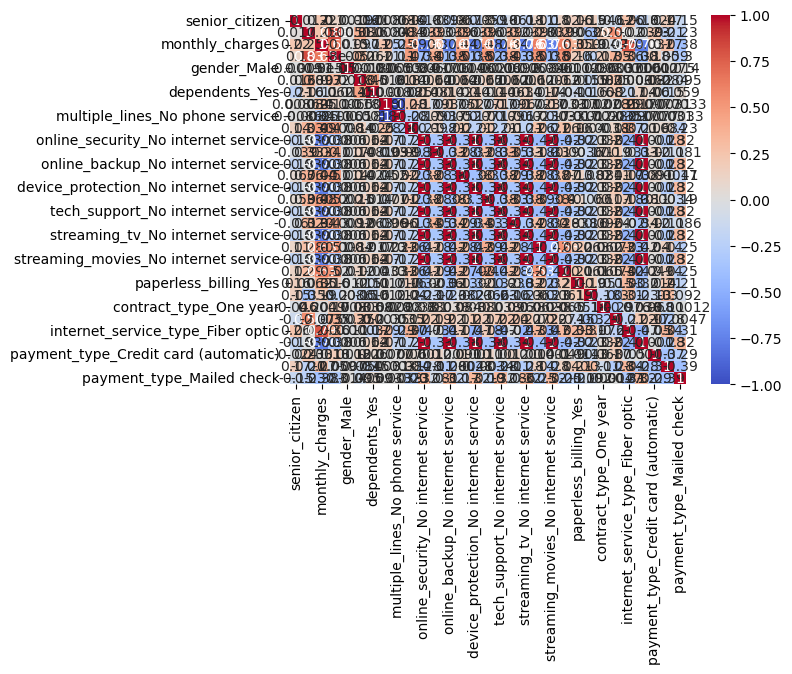

In [14]:
# Compute the correlation matrix
corr = df_telco.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

>- Contract type: customers with shorter contract lengths may be more likely to churn compared to those with longer contract lengths.
>- Internet service type: customers with fiber optic internet service may be more likely to churn compared to those without internet service or with other types of internet service.
>- Payment type: customers who pay by electronic check may be more likely to churn compared to those who pay by other methods such as credit card or mailed check.
>- Tenure: customers who are newer or who have been with the company for a moderate length of time may be more likely to churn compared to those who have been with the company for a longer period of time.
>- Streaming TV and movies: customers who do not have internet service or who do not have streaming TV or movies may be less likely to churn compared to those who have these services.

#### Does it make sense to combine any features?

                                                               0  \
customer_id                                           0002-ORFBO   
gender                                                    Female   
senior_citizen                                                 0   
partner                                                      Yes   
dependents                                                   Yes   
tenure                                                         9   
phone_service                                                Yes   
multiple_lines                                                No   
online_security                                               No   
online_backup                                                Yes   
device_protection                                             No   
tech_support                                                 Yes   
streaming_tv                                                 Yes   
streaming_movies                                

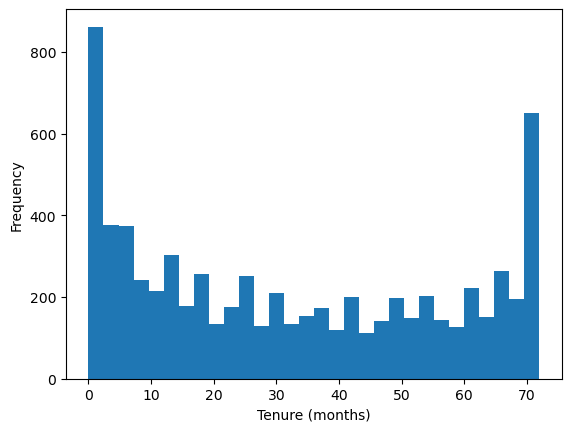

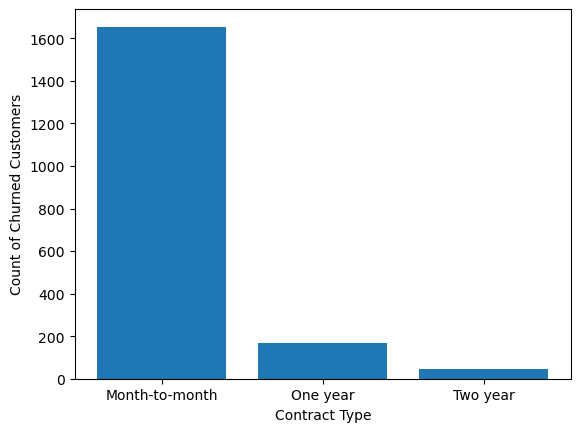

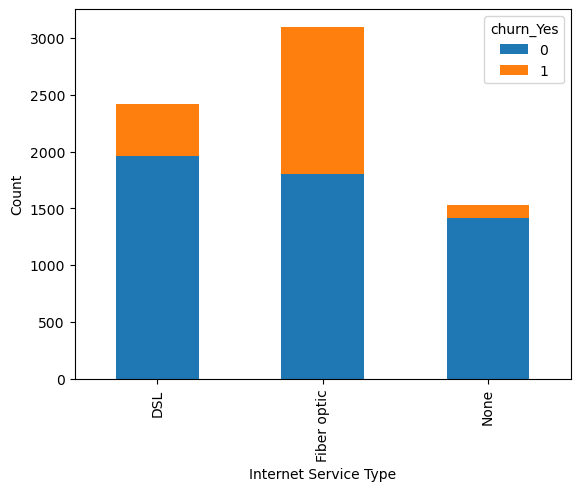

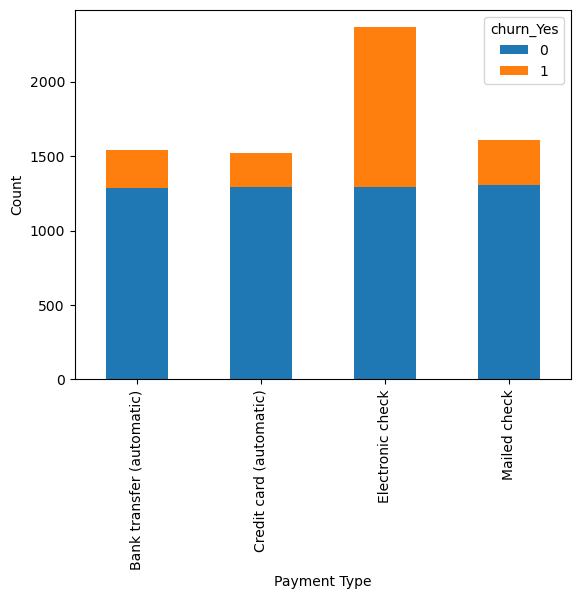

In [25]:
# Explore the data to identify potential drivers of churn
print(df_telco.head().T) # View the first few rows of data
print(df_telco.info()) # View the column data types and non-null values
print(df_telco.describe().T) # View summary statistics of numerical columns

# Plot a histogram of the tenure feature
plt.hist(df_telco['tenure'], bins=30)
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Group the data by contract type and count the number of churned customers in each group
contract_churn_counts = df_telco.groupby('contract_type')['churn_Yes'].sum()

# Plot a bar chart of the contract_type feature against the count of churned customers
plt.bar(contract_churn_counts.index, contract_churn_counts.values)
plt.xlabel('Contract Type')
plt.ylabel('Count of Churned Customers')
plt.show()


# Get the counts of churned and non-churned customers for each internet service type
counts_by_internet_service = df_telco.groupby(['internet_service_type', 'churn_Yes']).size().unstack()

# Plot a stacked bar chart of the counts
counts_by_internet_service.plot(kind='bar', stacked=True)
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


# Group data by payment type and churn status
grouped = df_telco.groupby(['payment_type', 'churn_Yes']).size().reset_index(name='count')

# Pivot data to create a stacked bar chart
pivot = grouped.pivot(index='payment_type', columns='churn_Yes', values='count')

# Plot stacked bar chart
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()



>Combining the "internet_service_type" and "online_security" columns to create a new column that indicates whether or not the customer has internet security could be useful in understanding the relationship between internet security and churn. Similarly, combining columns related to streaming TV and movies, as well as combining columns related to payment type, could also provide valuable insights. However, the decision to combine features ultimately depends on the specific goals and questions of the analysis.

#### Do you find any surprises?

>- Customers with Fiber optic internet service are more likely to churn than customers with DSL or no internet service.
>- Customers who have been with the company for a shorter amount of time are more likely to churn than those who have been with the company for a longer period.
>- Customers who have electronic check as their payment type are more likely to churn than those who use other payment types.
>- Customers who have streaming TV and streaming movies are less likely to churn than those who do not have these services.
>- Customers who have paperless billing are more likely to churn than those who receive paper bills.
>- Customers who have internet security and online backup services are less likely to churn than those who do not have these services.

#### Document any and all findings and takeaways in your notebook using markdown.

Findings:
>- Customers who do not have internet service are significantly less likely to churn compared to those with internet service.
>- Customers with fiber optic internet service are more likely to churn compared to those without internet service or with DSL service.
>- Customers who pay by electronic check are more likely to churn compared to those who pay by other methods such as mailed check or automatic credit card payment.
>- Customers with shorter tenures (less than 1 year) are more likely to churn compared to those with longer tenures.
>- Customers who do not have online security are more likely to churn compared to those with online security.
>- Customers who do not have tech support are more likely to churn compared to those with tech support.

Takeaways:
>- Telco company should investigate the reasons behind the high churn rate for customers with fiber optic service and consider making improvements to this service.
>- Telco company should encourage customers to use automatic credit card payment or mailed check to reduce the likelihood of churn.
>- Telco company should pay more attention to customers who are new or have short tenures, as they are at higher risk of churn.
>- Telco company should emphasize the importance of online security and tech support to customers and encourage them to sign up for these services.